In [1]:
from pathlib import Path
import sys

sys.path.append(str(Path().resolve().parent))

from scikit_quri.qkrr import QKRR
import numpy as np
from numpy.random import default_rng
from scikit_quri.circuit import create_ibm_embedding_circuit


def generate_noisy_sine(x_min, x_max, num_x):
    rng = default_rng(0)
    x_train = [[rng.uniform(x_min, x_max)] for _ in range(num_x)]
    y_train = [np.sin(np.pi * x[0]) for x in x_train]
    mag_noise = 0.01
    y_train += mag_noise * rng.random(num_x)
    return np.array(x_train), np.array(y_train)
    # return np.array(x_train).flatten(), np.array(y_train)


x_train, y_train = generate_noisy_sine(-1.0, 1.0, 300)
x_test, y_test = generate_noisy_sine(-1.0, 1.0, 100)

v1.1.1


In [2]:
n_qubit = 6
circuit = create_ibm_embedding_circuit(n_qubit)
qkrr = QKRR(circuit, n_iteration=100)
qkrr.fit(x_train, y_train)

{'alpha': 0.13130280280658593}


loss=5.160174217745281e-05


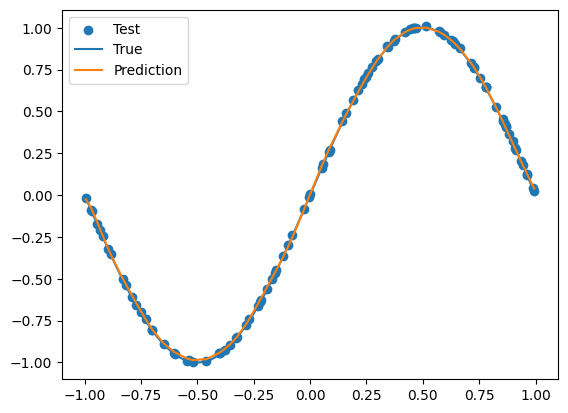

In [3]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

y_pred = qkrr.predict(x_test)
loss = mean_squared_error(y_test, y_pred)
print(f"{loss=}")

plt.scatter(np.sort(x_test.flatten()), y_test[np.argsort(x_test.flatten())], label="Test")
x_true = np.linspace(-1, 1, 100)
y_true = np.sin(np.pi * x_true)
plt.plot(x_true, y_true, label="True")
plt.plot(np.sort(x_test.flatten()), y_pred[np.argsort(x_test.flatten())], label="Prediction")
plt.legend()
plt.show()